In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from dateutil import parser
import re

In [19]:
tweets = pd.read_csv('raw_trump_tweets.csv')

In [20]:
type(tweets.loc[:, 'date'][0])

str

In [21]:
tweets['date']= pd.to_datetime(tweets['date'])
tweets = tweets[tweets['date'] >= np.datetime64('2017-01-20')]
tweets = tweets[tweets['date'] <= np.datetime64('2018-12-31')]
# >= 20th jan 2017, <= 31st Dec 2018

In [22]:
def process_and_remove_duplicates(tweets, date):
    duplicated_rows = tweets[tweets['date'] == date]
    id = max(duplicated_rows['id'])
    max_favorite = max(duplicated_rows['favorites'])
    max_retweet = max(duplicated_rows['retweets'])
    combined_tweet = ""
    device = duplicated_rows['device'].iloc[0]
    for index, row in duplicated_rows.iterrows():
        combined_tweet = row['text'] + ' ' + combined_tweet.strip('.')
    tweets = tweets[tweets.date != date]
    row = {'id': id, 'text': combined_tweet, 'isRetweet': 'f', 'isDeleted': 'f', 'device': device, 'favorites': max_favorite, 'retweets': max_retweet, 'date': date}
    tweets = tweets.append(row, ignore_index = True)   
    print(f"Combined {len(duplicated_rows)} tweets on {date}")
    return tweets

In [23]:
dates = tweets["date"]
duplicated = tweets[dates.isin(dates[dates.duplicated()])]
duplicated_dates = duplicated['date'].unique()

In [24]:
for date in duplicated_dates:
    tweets = process_and_remove_duplicates(tweets, date)

Combined 2 tweets on 2018-11-21T22:18:00.000000000
Combined 2 tweets on 2018-09-10T21:59:00.000000000
Combined 2 tweets on 2018-08-14T01:37:00.000000000
Combined 2 tweets on 2018-05-31T10:56:00.000000000
Combined 2 tweets on 2018-02-01T22:37:00.000000000
Combined 2 tweets on 2018-03-09T17:50:00.000000000
Combined 2 tweets on 2017-12-29T12:50:00.000000000
Combined 2 tweets on 2017-12-29T12:48:00.000000000
Combined 3 tweets on 2017-12-28T22:17:00.000000000
Combined 2 tweets on 2017-12-22T20:47:00.000000000
Combined 2 tweets on 2017-12-16T03:09:00.000000000
Combined 2 tweets on 2017-11-18T13:49:00.000000000
Combined 2 tweets on 2017-11-15T10:22:00.000000000
Combined 2 tweets on 2017-07-11T10:53:00.000000000
Combined 2 tweets on 2017-07-11T10:37:00.000000000
Combined 2 tweets on 2017-10-28T21:09:00.000000000
Combined 2 tweets on 2017-10-26T01:47:00.000000000
Combined 2 tweets on 2017-10-14T11:08:00.000000000
Combined 2 tweets on 2017-05-10T10:31:00.000000000
Combined 2 tweets on 2017-09-30

Combined 3 tweets on 2018-05-16T13:09:00.000000000
Combined 2 tweets on 2018-08-05T20:33:00.000000000
Combined 3 tweets on 2018-04-21T13:10:00.000000000
Combined 3 tweets on 2018-04-21T12:17:00.000000000
Combined 2 tweets on 2018-04-20T10:34:00.000000000
Combined 2 tweets on 2018-04-19T22:30:00.000000000
Combined 2 tweets on 2018-04-18T12:05:00.000000000
Combined 3 tweets on 2018-04-18T09:42:00.000000000
Combined 2 tweets on 2018-04-17T21:55:00.000000000
Combined 2 tweets on 2018-04-17T21:34:00.000000000
Combined 2 tweets on 2018-04-17T17:26:00.000000000
Combined 2 tweets on 2018-04-17T17:25:00.000000000
Combined 4 tweets on 2018-04-17T12:24:00.000000000
Combined 2 tweets on 2018-04-17T00:57:00.000000000
Combined 2 tweets on 2018-04-17T00:56:00.000000000
Combined 2 tweets on 2018-03-28T21:31:00.000000000
Combined 2 tweets on 2018-03-15T17:47:00.000000000
Combined 2 tweets on 2018-03-02T14:40:00.000000000
Combined 2 tweets on 2018-01-28T13:18:00.000000000
Combined 2 tweets on 2018-01-21

In [25]:
tweets

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,f,f,Twitter for iPhone,157963,37189,2017-06-12 15:00:00
1,9.391890e+17,MAKE AMERICA GREAT AGAIN! https://t.co/64a93S07s7,f,f,Twitter for iPhone,56596,11433,2017-08-12 17:46:00
2,9.353400e+17,Thank you Rand! https://t.co/NvPeleVmub,f,f,Twitter for iPhone,42793,9125,2017-11-28 02:50:00
3,9.253890e+17,Thank you @LuisRiveraMarin! https://t.co/BK7sD...,f,f,Twitter for iPhone,23521,4574,2017-10-31 15:48:00
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",f,f,Twitter for iPhone,36009,4891,2017-08-22 01:00:00
...,...,...,...,...,...,...,...,...
5762,9.576040e+17,Somebody please inform Jay-Z that because of m...,f,f,Twitter for iPhone,202727,49876,2018-01-28 13:18:00
5763,9.549040e+17,"""RT @FoxNews: .@EricTrump: """"People have seen ...",f,f,Twitter for iPhone,0,10358,2018-01-21 02:31:00
5764,9.530680e+17,"RT @realDonaldTrump: I, as President, want peo...",f,f,Twitter for iPhone,0,30779,2018-01-16 00:53:00
5765,9.530670e+17,RT @realDonaldTrump: “President Trump is not g...,f,f,Twitter for iPhone,0,19817,2018-01-16 00:52:00


In [28]:
## tweets that are Trump's
tweets1 = tweets[tweets['isRetweet'] == 'f'].reset_index(drop=True)
tweets1 = tweets1[tweets1['text'].str.contains('RT @') == False]
tweets1['cleaned_text'] = tweets1['text'].apply(lambda x: re.sub(r'https?:\/\/\S*', '', x, flags=re.MULTILINE))
tweets1 = tweets1[tweets1['cleaned_text'].str.strip() != '']

tweets1

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,cleaned_text
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,f,f,Twitter for iPhone,157963,37189,2017-06-12 15:00:00,MAKE AMERICA GREAT AGAIN!
1,9.391890e+17,MAKE AMERICA GREAT AGAIN! https://t.co/64a93S07s7,f,f,Twitter for iPhone,56596,11433,2017-08-12 17:46:00,MAKE AMERICA GREAT AGAIN!
2,9.353400e+17,Thank you Rand! https://t.co/NvPeleVmub,f,f,Twitter for iPhone,42793,9125,2017-11-28 02:50:00,Thank you Rand!
3,9.253890e+17,Thank you @LuisRiveraMarin! https://t.co/BK7sD...,f,f,Twitter for iPhone,23521,4574,2017-10-31 15:48:00,Thank you @LuisRiveraMarin!
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",f,f,Twitter for iPhone,36009,4891,2017-08-22 01:00:00,"Join me live from Fort Myer in Arlington, Virg..."
...,...,...,...,...,...,...,...,...,...
5249,9.862190e+17,"Employment is up, Taxes are DOWN. Enjoy! I am ...",f,f,Twitter for iPhone,106514,19661,2018-04-17 12:24:00,"Employment is up, Taxes are DOWN. Enjoy! I am ..."
5252,9.791090e+17,I am pleased to announce that I intend to nomi...,f,f,Twitter for iPhone,66173,13399,2018-03-28 21:31:00,I am pleased to announce that I intend to nomi...
5254,9.597990e+17,Rasmussen just announced that my approval rati...,f,f,Twitter for iPhone,132165,30235,2018-03-02 14:40:00,Rasmussen just announced that my approval rati...
5255,9.576040e+17,Somebody please inform Jay-Z that because of m...,f,f,Twitter for iPhone,202727,49876,2018-01-28 13:18:00,Somebody please inform Jay-Z that because of m...


In [30]:
tweets2 = tweets1.loc[:, ['id', 'cleaned_text', 'favorites', 'retweets', 'date']]

tweets2['date_new'] = [i + timedelta(hours = 8) for i in tweets2['date']]

tweets2['date_part'] = [i.date() for i in tweets2['date_new']]

tweets2['time_part'] = [i.time() for i in tweets2['date_new']]

tweets2['hour'] = [int(str(i).split(":")[0]) for i in tweets2['time_part']]

tweets2['year'] = [int(str(i).split("-")[0]) for i in tweets2['date_part']]

tweets2['month'] = [int(str(i).split("-")[1]) for i in tweets2['date_part']]

tweets2

,id,cleaned_text,favorites,retweets,date,date_new,date_part,time_part,hour,year,month
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,157963,37189,2017-06-12 15:00:00,2017-06-12 23:00:00,2017-06-12,23:00:00,23,2017,6
1,9.391890e+17,MAKE AMERICA GREAT AGAIN!,56596,11433,2017-08-12 17:46:00,2017-08-13 01:46:00,2017-08-13,01:46:00,1,2017,8
2,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11
3,9.253890e+17,Thank you @LuisRiveraMarin!,23521,4574,2017-10-31 15:48:00,2017-10-31 23:48:00,2017-10-31,23:48:00,23,2017,10
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8
...,...,...,...,...,...,...,...,...,...,...,...
5249,9.862190e+17,"Employment is up, Taxes are DOWN. Enjoy! I am ...",106514,19661,2018-04-17 12:24:00,2018-04-17 20:24:00,2018-04-17,20:24:00,20,2018,4
5252,9.791090e+17,I am pleased to announce that I intend to nomi...,66173,13399,2018-03-28 21:31:00,2018-03-29 05:31:00,2018-03-29,05:31:00,5,2018,3
5254,9.597990e+17,Rasmussen just announced that my approval rati...,132165,30235,2018-03-02 14:40:00,2018-03-02 22:40:00,2018-03-02,22:40:00,22,2018,3
5255,9.576040e+17,Somebody please inform Jay-Z that because of m...,202727,49876,2018-01-28 13:18:00,2018-01-28 21:18:00,2018-01-28,21:18:00,21,2018,1


In [31]:
tweets2.to_csv("trump_tweets_cleaned.csv", index=False, header=True)

In [32]:
tweets2018 = tweets2[tweets2['year'] == 2018]
tweets2017 = tweets2[tweets2['year'] == 2017]

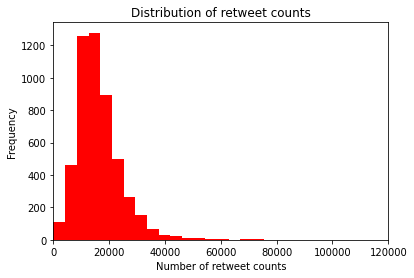

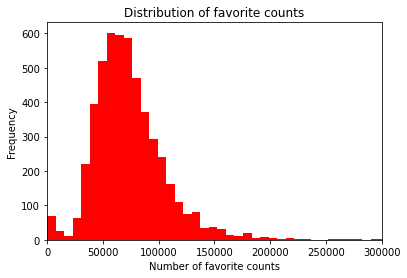

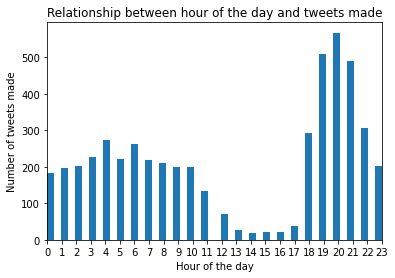

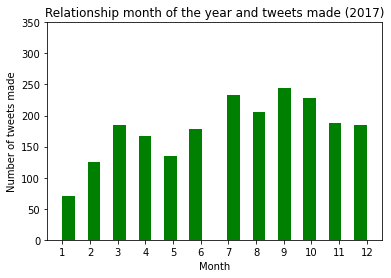

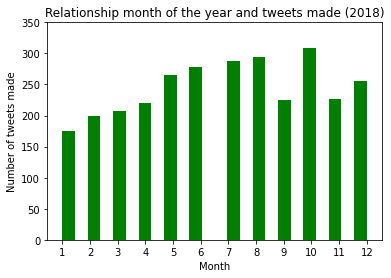

In [33]:
plt.hist(tweets2.retweets, bins = 70, color = 'red')
plt.xlim(left=0, right=120000)
plt.title('Distribution of retweet counts')
plt.xlabel('Number of retweet counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets2.favorites, bins = 70, color = 'red')
plt.xlim(left=0, right=300000)
plt.title('Distribution of favorite counts')
plt.xlabel('Number of favorite counts')
plt.ylabel('Frequency')
plt.show()

plt.hist(tweets2.hour, bins = 48)
plt.xlim(left=0, right=23)
plt.title('Relationship between hour of the day and tweets made')
plt.xlabel('Hour of the day')
plt.ylabel('Number of tweets made')
plt.xticks(range(0,24))
plt.show()

plt.hist(tweets2017.month, bins = 24, color = 'green')
plt.title('Relationship month of the year and tweets made (2017)')
plt.xlabel('Month')
plt.ylabel('Number of tweets made')
plt.xticks(range(1,13))
plt.yticks(range(0,400,50))
plt.show()

plt.hist(tweets2018.month, bins = 24, color = 'green')
plt.title('Relationship month of the year and tweets made (2018)')
plt.xlabel('Month')
plt.ylabel('Number of tweets made')
plt.xticks(range(1,13))
plt.yticks(range(0,400,50))
plt.show()

In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
tweets2['sentiment_score'] = tweets2['cleaned_text'].apply(sid.polarity_scores)
tweets2['tweet_length'] = [len(i) for i in tweets2['cleaned_text']]
tweets2['compound'] = [i['compound'] for i in tweets2['sentiment_score']]

tweets2

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vedan\Anaconda3\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,cleaned_text,favorites,retweets,date,date_new,date_part,time_part,hour,year,month,sentiment_score,tweet_length,compound
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,157963,37189,2017-06-12 15:00:00,2017-06-12 23:00:00,2017-06-12,23:00:00,23,2017,6,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",25,0.6588
1,9.391890e+17,MAKE AMERICA GREAT AGAIN!,56596,11433,2017-08-12 17:46:00,2017-08-13 01:46:00,2017-08-13,01:46:00,1,2017,8,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",26,0.6588
2,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",16,0.4199
3,9.253890e+17,Thank you @LuisRiveraMarin!,23521,4574,2017-10-31 15:48:00,2017-10-31 23:48:00,2017-10-31,23:48:00,23,2017,10,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",28,0.4199
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",54,0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,9.862190e+17,"Employment is up, Taxes are DOWN. Enjoy! I am ...",106514,19661,2018-04-17 12:24:00,2018-04-17 20:24:00,2018-04-17,20:24:00,20,2018,4,"{'neg': 0.07, 'neu': 0.757, 'pos': 0.173, 'com...",546,0.8942
5252,9.791090e+17,I am pleased to announce that I intend to nomi...,66173,13399,2018-03-28 21:31:00,2018-03-29 05:31:00,2018-03-29,05:31:00,5,2018,3,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",305,0.9565
5254,9.597990e+17,Rasmussen just announced that my approval rati...,132165,30235,2018-03-02 14:40:00,2018-03-02 22:40:00,2018-03-02,22:40:00,22,2018,3,"{'neg': 0.112, 'neu': 0.72, 'pos': 0.168, 'com...",533,0.7250
5255,9.576040e+17,Somebody please inform Jay-Z that because of m...,202727,49876,2018-01-28 13:18:00,2018-01-28 21:18:00,2018-01-28,21:18:00,21,2018,1,"{'neg': 0.145, 'neu': 0.757, 'pos': 0.097, 'co...",388,-0.5882


In [35]:
import spacy
import en_core_web_sm

# Instantiate the English model: nlp
nlp = en_core_web_sm.load()

# # Create a new document: doc
# doc = nlp(article)

# # Print all of the found entities and their labels
# for ent in doc.ents:
#     print(ent.label_, ent.text)
    
tweets2['entity'] = [[j.text for j in nlp(i).ents] for i in tweets2['cleaned_text']]
tweets2['entity_type'] = [[j.label_ for j in nlp(i).ents] for i in tweets2['cleaned_text']]

tweets2

,id,cleaned_text,favorites,retweets,date,date_new,date_part,time_part,hour,year,month,sentiment_score,tweet_length,compound,entity,entity_type
0,9.384230e+17,MAKE AMERICA GREAT AGAIN!,157963,37189,2017-06-12 15:00:00,2017-06-12 23:00:00,2017-06-12,23:00:00,23,2017,6,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",25,0.6588,[],[]
1,9.391890e+17,MAKE AMERICA GREAT AGAIN!,56596,11433,2017-08-12 17:46:00,2017-08-13 01:46:00,2017-08-13,01:46:00,1,2017,8,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",26,0.6588,[],[]
2,9.353400e+17,Thank you Rand!,42793,9125,2017-11-28 02:50:00,2017-11-28 10:50:00,2017-11-28,10:50:00,10,2017,11,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",16,0.4199,[Rand],[ORG]
3,9.253890e+17,Thank you @LuisRiveraMarin!,23521,4574,2017-10-31 15:48:00,2017-10-31 23:48:00,2017-10-31,23:48:00,23,2017,10,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",28,0.4199,[],[]
4,8.997980e+17,"Join me live from Fort Myer in Arlington, Virg...",36009,4891,2017-08-22 01:00:00,2017-08-22 09:00:00,2017-08-22,09:00:00,9,2017,8,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",54,0.2960,"[Fort Myer, Arlington, Virginia, ➡]","[GPE, GPE, GPE, ORG]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,9.862190e+17,"Employment is up, Taxes are DOWN. Enjoy! I am ...",106514,19661,2018-04-17 12:24:00,2018-04-17 20:24:00,2018-04-17,20:24:00,20,2018,4,"{'neg': 0.07, 'neu': 0.757, 'pos': 0.173, 'com...",546,0.8942,"[Florida, Abe, Japan, Working on Trade and Mil...","[GPE, PERSON, GPE, ORG, PERSON, GPE, ORG, GPE,..."
5252,9.791090e+17,I am pleased to announce that I intend to nomi...,66173,13399,2018-03-28 21:31:00,2018-03-29 05:31:00,2018-03-29,05:31:00,5,2018,3,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",305,0.9565,"[Ronny L. Jackson, MD, Veterans Affairs, Hon, ...","[PERSON, ORG, ORG, ORG, PERSON, ORG, PERSON]"
5254,9.597990e+17,Rasmussen just announced that my approval rati...,132165,30235,2018-03-02 14:40:00,2018-03-02 22:40:00,2018-03-02,22:40:00,22,2018,3,"{'neg': 0.112, 'neu': 0.72, 'pos': 0.168, 'com...",533,0.7250,"[49%, Russian, Hunt, one year, American]","[PERCENT, NORP, PERSON, DATE, NORP]"
5255,9.576040e+17,Somebody please inform Jay-Z that because of m...,202727,49876,2018-01-28 13:18:00,2018-01-28 21:18:00,2018-01-28,21:18:00,21,2018,1,"{'neg': 0.145, 'neu': 0.757, 'pos': 0.097, 'co...",388,-0.5882,"[Jay-Z, Black Unemployment, many decades, Amer...","[PERSON, ORG, DATE, GPE, ORG, GPE, GPE]"


In [ ]:
list(tweets2['entity'])